In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/Admin/Downloads/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

# ***Data Exploration***

In [5]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

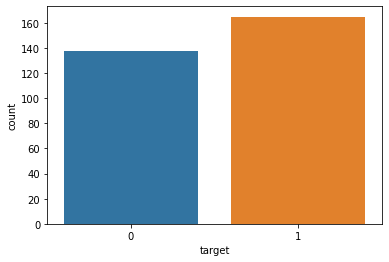

In [9]:
sns.countplot(x='target', data=data)
plt.show()

In [10]:
# Importing model
from sklearn.model_selection import train_test_split

In [12]:
x= pd.DataFrame(data.iloc[:,:-1])
y= pd.DataFrame(data.iloc[:,-1])

In [15]:
x.shape, y.shape

((303, 13), (303, 1))

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)

In [17]:
# Creating Model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Predicting the Result

y_pred = logmodel.predict(x_test)

In [19]:
# Calculating Accuracy

print('Accuracy: ', (logmodel.score(x_test, y_test)))

Accuracy:  0.8021978021978022


In [20]:
# Evaluation using Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [21]:
confusion_matrix

array([[30, 11],
       [ 7, 43]], dtype=int64)

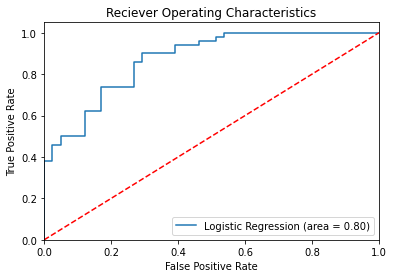

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

***We can say that our classifier model was good enough with 80% accuracy***